<a href="https://colab.research.google.com/github/maggiemcc02/Summer2023_Codes/blob/main/Inverse_MMPDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install FireDrake

In [ ]:
try:
  from firedrake import *
except ImportError:
  !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
  from firedrake import *

In [ ]:
from firedrake import *
import numpy as np

# Focus on The $\xi$ Solution

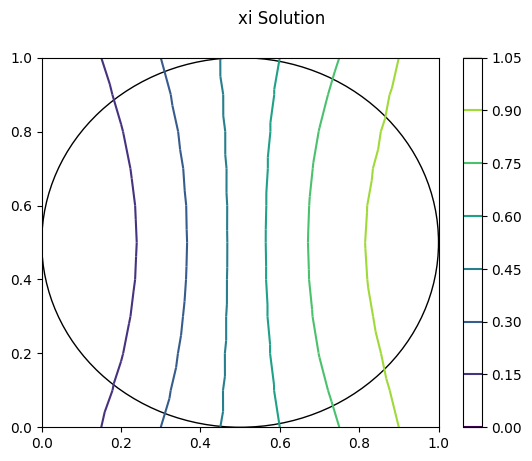

In [ ]:

# set the mesh

mesh = UnitSquareMesh(10, 10)

# set the function space - piecewise linear

V = FunctionSpace(mesh, "CG", 1)


# Access the Mesh Coordinates

x, y = SpatialCoordinate(mesh)



# set the test and and trial functions

xi_sol  = TrialFunction(V)
v_xi = TestFunction(V)

R = Constant(10)
# M.interpolate( 1 / (1 + exp(R * ((1/4)**2 - ( (x - 1/2)**2 + (y - 1/2)**2) ))))
M = 1 + exp(R * ((1/2)**2 - ( (x - 1/2)**2 + (y - 1/2)**2) ))


# define the bilinear and linear forms

a_xi = ( (1/M) * inner(grad(xi_sol), grad(v_xi) ) ) * dx

L_xi = ( Constant(0) * v_xi ) * dx



# the conditions



bc1 =  DirichletBC(V,Constant(0), 1)
bc2 = DirichletBC(V, Constant(1), 2)
bc3 = DirichletBC(V, x, 3)
bc4 = DirichletBC(V, x, 4)

bcs = [ bc1, bc2, bc3, bc4]



# where to hold the solution

xi_sol = Function(V)


# solve the problem


solve( a_xi == L_xi  , xi_sol, bcs = bcs )





# Plotting the Solution


try:
    import matplotlib.pyplot as plt
except:
    warning("Matplotlib not imported")

try:

    fig, axes = plt.subplots()

    # levels = np.linspace(0,1, 20)


    contours = tricontour(xi_sol,  axes = axes) # The level curves for the solution

    drawing_circle = plt.Circle((1/2, 1/2), 1/2, fill = False)


    axes.add_patch(drawing_circle)



    fig.colorbar(contours)
    fig.suptitle("xi Solution")



except Exception as e:
    warning('Cannot plot figure. Error msg "%s"' %e)


try:
    plt.show()

except Exception as e:
    warning("Cannot show figure. Error msg: '%s'" %e)



# Focus on The $y$ Solution

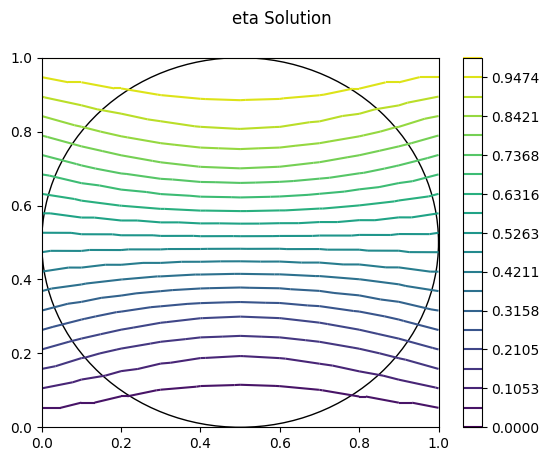

In [ ]:

# set the mesh

mesh = UnitSquareMesh(10, 10)

# set the function space - piecewise linear

V = FunctionSpace(mesh, "CG", 1)


# Access the Mesh Coordinates

x, y = SpatialCoordinate(mesh)



# set the test and and trial functions

eta_sol  = TrialFunction(V)
v_eta = TestFunction(V)

# M = Function(V)
# R = Constant(10)
# M.interpolate(1 / (1 + exp(R * ((1/4)**2 - ( (x - 1/2)**2 + (y - 1/2)**2) ))))
# M.interpolate(1 + exp(R * ((1/4)**2 - ( (x - 1/2)**2 + (y - 1/2)**2) )))

M = 1 + exp(R * ((1/2)**2 - ( (x - 1/2)**2 + (y - 1/2)**2) ))



# define the bilinear and linear forms

a_eta = ( (1/M)*inner( grad(eta_sol), grad(v_eta) ) ) * dx

L_eta = ( Constant(0) * v_eta ) * dx




bc1 =  DirichletBC(V, y, 1)
bc2 = DirichletBC(V, y, 2)
bc3 = DirichletBC(V, Constant(0), 3)
bc4 = DirichletBC(V, Constant(1), 4)

bcs = [ bc1, bc2, bc3, bc4]



# where to hold the solution

eta_sol = Function(V)


# solve the problem


solve( a_eta == L_eta  , eta_sol, bcs = bcs )





# Plotting the Solution


try:
    import matplotlib.pyplot as plt
except:
    warning("Matplotlib not imported")

try:

    fig, axes = plt.subplots()

    levels = np.linspace(0,1, 20)


    contours = tricontour(eta_sol,  axes = axes, levels = levels) # The level curves for the solution


    drawing_circle = plt.Circle((1/2, 1/2), 1/2, fill = False)


    axes.add_patch(drawing_circle)


    fig.colorbar(contours)


    fig.suptitle("eta Solution")



except Exception as e:
    warning('Cannot plot figure. Error msg "%s"' %e)


try:
    plt.show()

except Exception as e:
    warning("Cannot show figure. Error msg: '%s'" %e)

In [ ]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize = (8,8))
# ax = plt.axes(projection = '3d')

# Data for a three-dimensional line
# z = np.linspace(0, 15, 1000)
# x = np.sin(z)
# y = np.cos(z)
# ax.plot3D(x, y, eta_sol.dat.data, 'green')

# ax.view_init(-140, 60)

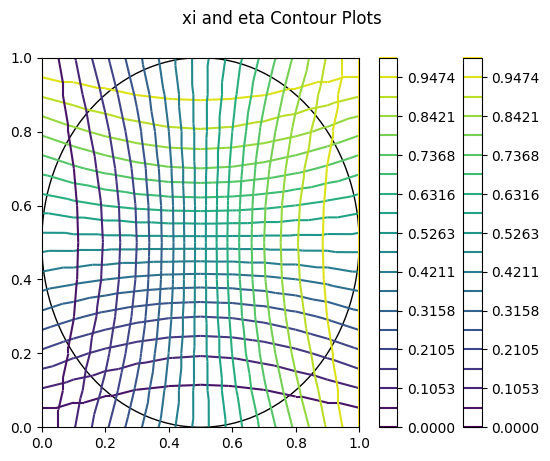

In [ ]:
# both solutions


try:

    fig, axes = plt.subplots()
    levels = np.linspace(0, 1, 20)
    contours_y = tricontour(eta_sol,  axes = axes, levels = levels)
    contours_x = tricontour(xi_sol,  axes = axes, levels = levels)

    drawing_circle = plt.Circle((1/2, 1/2), 1/2, fill = False)


    axes.add_patch(drawing_circle)



    fig.colorbar(contours_y)
    fig.colorbar(contours_x)
    fig.suptitle("xi and eta Contour Plots")



except Exception as e:
    warning('Cannot plot figure. Error msg "%s"' %e)


try:
    plt.show()

except Exception as e:
    warning("Cannot show figure. Error msg: '%s'" %e)

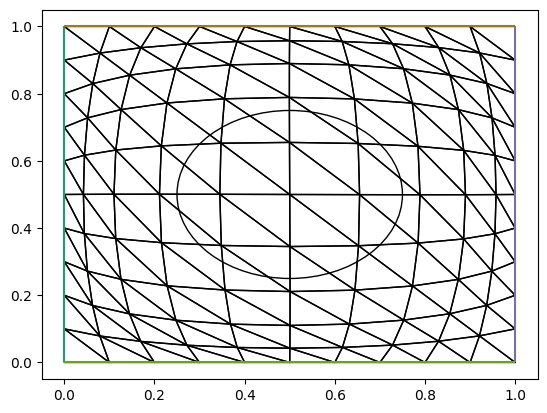

In [ ]:
N = np.shape(xi_sol.dat.data)[0]
mesh_values = np.zeros([N,2])
mesh_values[:,0] = xi_sol.dat.data
mesh_values[:,1] = eta_sol.dat.data
mesh.coordinates.dat.data[:] = mesh_values
fig, axes = plt.subplots()
triplot(mesh, axes=axes)
drawing_circle = plt.Circle((0.5, 0.5), 1/4, fill = False)

axes.add_patch(drawing_circle)


# Trying to Retrieve $(x, y)$ Values

In [ ]:
xi_eval = xi_sol.at(np.array([0.1, 0.5]))

print(xi_eval)



0.04244226024588619


In [ ]:
p_ij_0 = np.array([0, 0])

delta_t = 0.1

IC = 10
JC = 10


p_ijs = []
p_ij_list = []

count = 1


for i in range(0, IC+1): # set the i index
  for j in range(0, JC+1): # set the j index

    print(count)
    print()
    print()

    count += 1

    uni_point = np.array([i/ IC, j/JC]) # set the uniform grid point

    # the n loop

    #print()
    #print()
    print()
    print('i = ', i, 'and j = ', j)
    print(uni_point)
    print()
    #print()
    #print()


    # stopping criteria

    max_iter = 100
    iter = 0
    check = 100
    tol = 1e-6
    n = -1

    p_ijs.append(p_ij_list) # save the last iteration results

    p_ij_list = [uni_point]



    while (check > tol and iter < max_iter) :




      # updates

      n += 1
      iter+=1

      #print('n = ', n, end = " ")

      # set p_{ij}^n

      pij_n = p_ij_list[n]


      # compute the xi and eta values

      xi_eval = xi_sol.at(pij_n)
      eta_eval = eta_sol.at(pij_n)

      XI = np.array([xi_eval, eta_eval])

      # check

      check = np.linalg.norm( XI - uni_point )

      #print('Check = ', check, end = " ")

      if check < tol: # can we stop?

        p_ij_list.append('good')
        break

      # update p_{ij}

      p_ij = pij_n - delta_t * ( XI - uni_point )

      # save it

      p_ij_list.append(p_ij)

      #print('pij = ', p_ij)
      #print()
      #print()
      # print(p_ij_list)
      # print()


1



i =  0 and j =  0
[0. 0.]

2



i =  0 and j =  1
[0.  0.1]

3



i =  0 and j =  2
[0.  0.2]

4



i =  0 and j =  3
[0.  0.3]

5



i =  0 and j =  4
[0.  0.4]

6



i =  0 and j =  5
[0.  0.5]

7



i =  0 and j =  6
[0.  0.6]

8



i =  0 and j =  7
[0.  0.7]

9



i =  0 and j =  8
[0.  0.8]

10



i =  0 and j =  9
[0.  0.9]

11



i =  0 and j =  10
[0. 1.]

12



i =  1 and j =  0
[0.1 0. ]

13



i =  1 and j =  1
[0.1 0.1]

14



i =  1 and j =  2
[0.1 0.2]

15



i =  1 and j =  3
[0.1 0.3]

16



i =  1 and j =  4
[0.1 0.4]

17



i =  1 and j =  5
[0.1 0.5]

18



i =  1 and j =  6
[0.1 0.6]

19



i =  1 and j =  7
[0.1 0.7]

20



i =  1 and j =  8
[0.1 0.8]

21



i =  1 and j =  9
[0.1 0.9]

22



i =  1 and j =  10
[0.1 1. ]

23



i =  2 and j =  0
[0.2 0. ]

24



i =  2 and j =  1
[0.2 0.1]

25



i =  2 and j =  2
[0.2 0.2]

26



i =  2 and j =  3
[0.2 0.3]

27



i =  2 and j =  4
[0.2 0.4]

28



i =  2 and j =  5
[0.2 0.5]

29



i =  2 and j =  6
[0.2 0.

In [ ]:
x_points = []
y_points = []

for i in range(1, len(p_ijs)):

  print('p_ij = ', p_ijs[i][-2])

  point = p_ijs[i][-2]

  xi_eval = xi_sol.at(point)
  eta_eval = eta_sol.at(point)

  XI = np.array([xi_eval, eta_eval])

  x_points.append(p_ijs[i][-2][0])
  y_points.append(p_ijs[i][-2][1])


  print('The uniform point', p_ijs[i][0])
  print('XI(p_ij) =', XI)
  print()
  print()

p_ij =  [0. 0.]
The uniform point [0. 0.]
XI(p_ij) = [ 2.40297793e-18 -4.16333634e-17]


p_ij =  [0.  0.1]
The uniform point [0.  0.1]
XI(p_ij) = [-2.08166817e-17  1.00000000e-01]


p_ij =  [0.  0.2]
The uniform point [0.  0.2]
XI(p_ij) = [-2.50168764e-17  2.00000000e-01]


p_ij =  [0.  0.3]
The uniform point [0.  0.3]
XI(p_ij) = [-2.22235156e-17  3.00000000e-01]


p_ij =  [0.  0.4]
The uniform point [0.  0.4]
XI(p_ij) = [-1.20748117e-17  4.00000000e-01]


p_ij =  [0.  0.5]
The uniform point [0.  0.5]
XI(p_ij) = [-1.43982079e-17  5.00000000e-01]


p_ij =  [0.  0.6]
The uniform point [0.  0.6]
XI(p_ij) = [-1.6224265e-17  6.0000000e-01]


p_ij =  [0.  0.7]
The uniform point [0.  0.7]
XI(p_ij) = [-1.42533799e-17  7.00000000e-01]


p_ij =  [0.  0.8]
The uniform point [0.  0.8]
XI(p_ij) = [-1.55227496e-17  8.00000000e-01]


p_ij =  [0.  0.9]
The uniform point [0.  0.9]
XI(p_ij) = [-1.82271197e-17  9.00000000e-01]


p_ij =  [0. 1.]
The uniform point [0. 1.]
XI(p_ij) = [-2.28684945e-17  1.000

In [ ]:
N = len(x_points)
print(N)
mesh_values = np.zeros([N,2])
mesh_values[:,0] = x_points
mesh_values[:,1] = y_points
mesh.coordinates.dat.data[:] = mesh_values
fig, axes = plt.subplots()
triplot(mesh, axes=axes)

120


ValueError: ignored

In [ ]:
for i in range(len(p_ijs)):
  print(p_ijs[i][-2])